# 1.CocaCola Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [7]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [8]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
# Visualization

<AxesSubplot:>

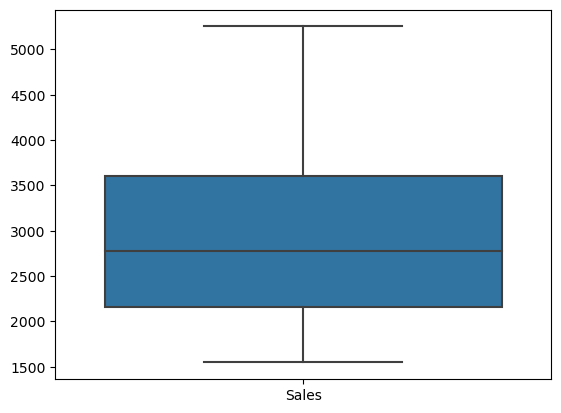

In [10]:
import seaborn as  sns
sns.boxplot(data =df)

<AxesSubplot:>

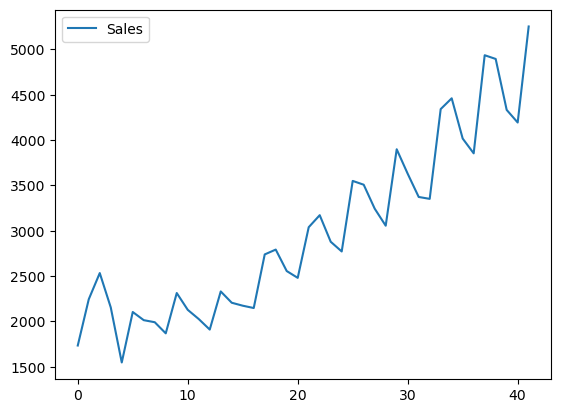

In [11]:
df.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

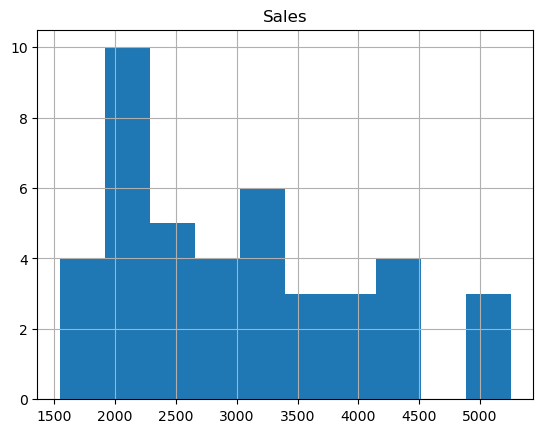

In [12]:
df.hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

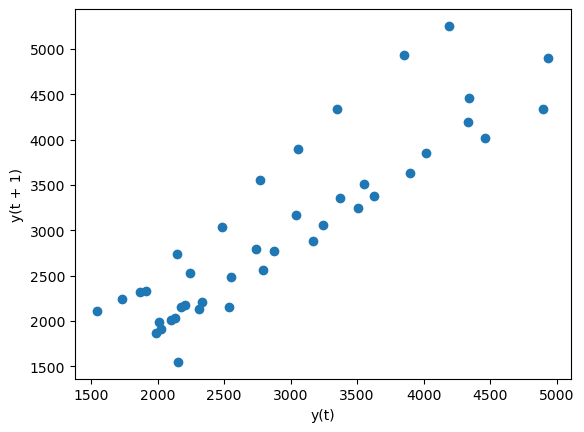

In [13]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

In [14]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [15]:
len(df)

42

In [16]:
df_dummies=pd.DataFrame(pd.get_dummies(df['Quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)

In [17]:
cc

,Quarter,Sales,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,NaN,NaN,NaN,NaN
1,Q2_86,2244.960999,NaN,NaN,NaN,NaN
2,Q3_86,2533.804993,NaN,NaN,NaN,NaN
3,Q4_86,2154.962997,NaN,NaN,NaN,NaN
4,Q1_87,1547.818996,NaN,NaN,NaN,NaN
5,Q2_87,2104.411995,NaN,NaN,NaN,NaN
6,Q3_87,2014.362999,NaN,NaN,NaN,NaN
7,Q4_87,1991.746998,NaN,NaN,NaN,NaN
8,Q1_88,1869.049999,NaN,NaN,NaN,NaN
9,Q2_88,2313.631996,NaN,NaN,NaN,NaN


In [18]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(df['Sales'])

In [19]:
cc.head()

,Quarter,Sales,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,NaN,NaN,NaN,NaN,1,1,7.458663
1,Q2_86,2244.960999,NaN,NaN,NaN,NaN,2,4,7.716443
2,Q3_86,2533.804993,NaN,NaN,NaN,NaN,3,9,7.837477
3,Q4_86,2154.962997,NaN,NaN,NaN,NaN,4,16,7.675529
4,Q1_87,1547.818996,NaN,NaN,NaN,NaN,5,25,7.344602


In [20]:
train =cc.head(32)
test =cc.tail(10)

<AxesSubplot:>

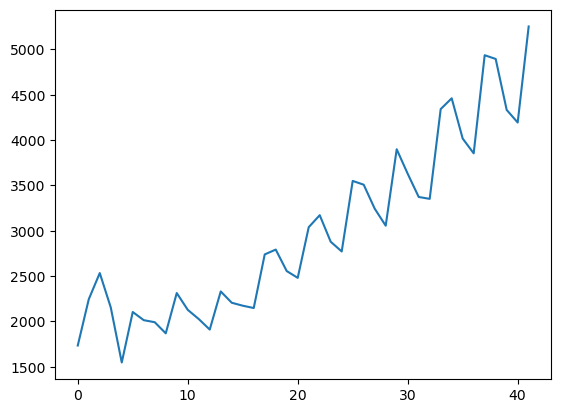

In [21]:
df['Sales'].plot()

#  Models

In [22]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [23]:
# Linear Model

linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767121

In [24]:
#Quadratic Model

quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407437

In [25]:
# Exponential model

exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [26]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# ARIMA Model

In [27]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [28]:
#separate out a validation dataset

split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [29]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [30]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [31]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Validation

In [32]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [33]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# 2.Airlines Dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [36]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [37]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [38]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


In [39]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


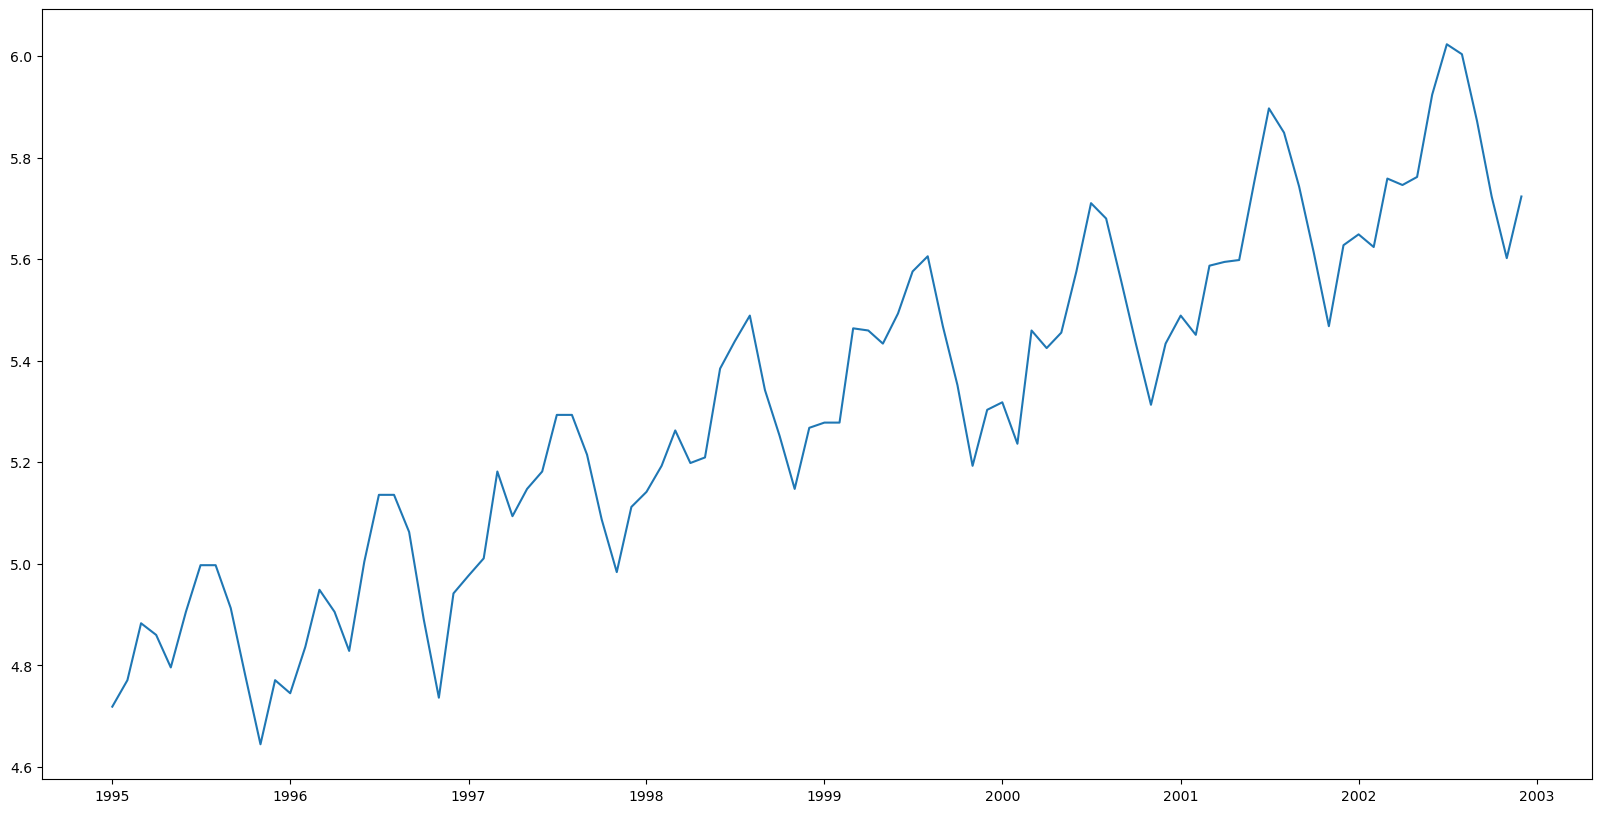

In [40]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

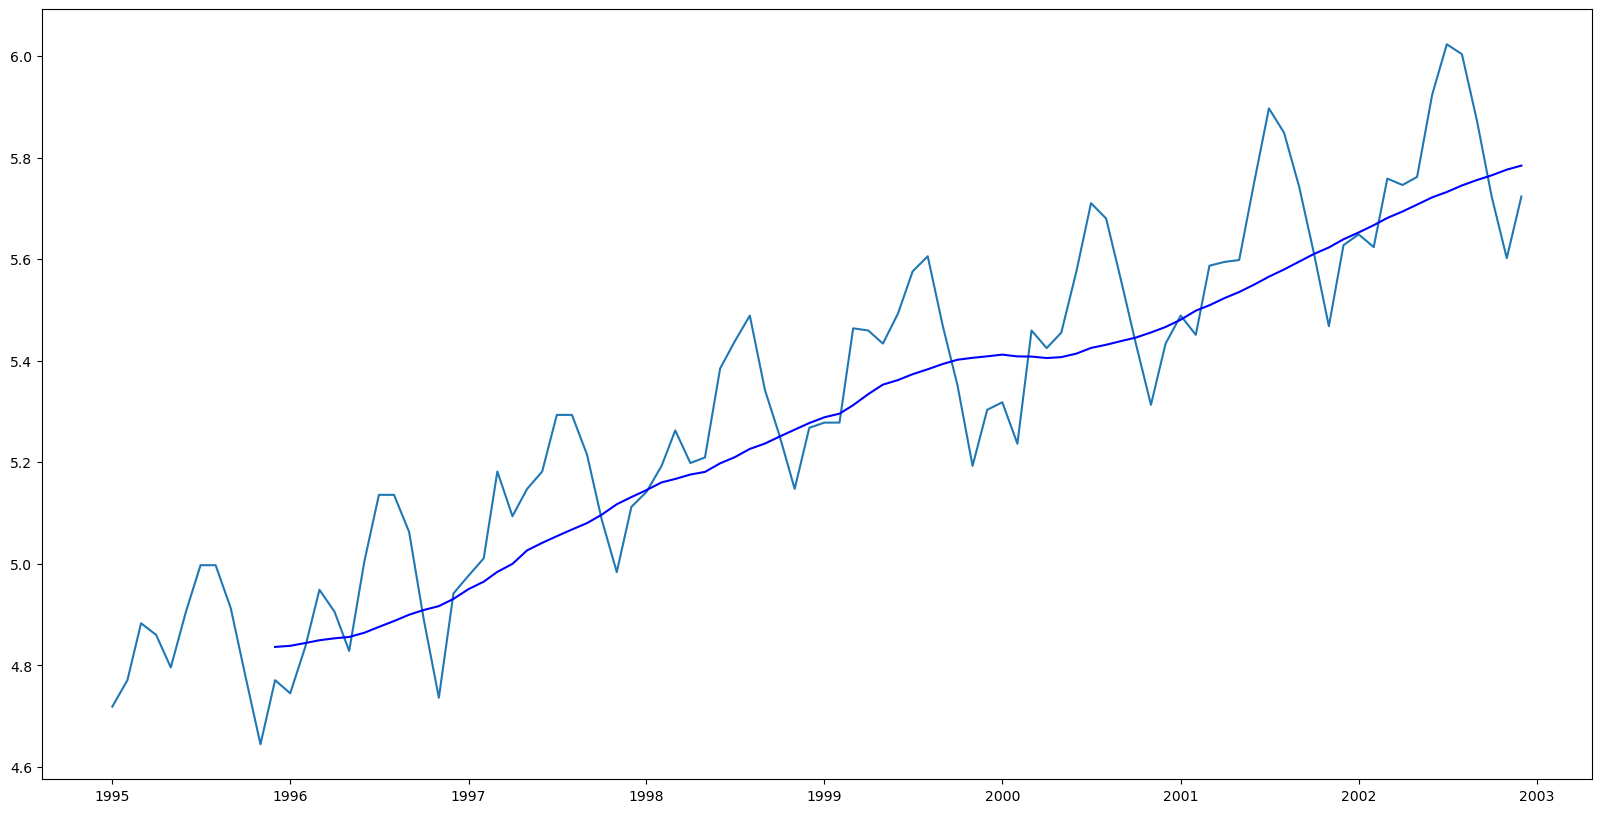

In [41]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [42]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)


,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [43]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [44]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


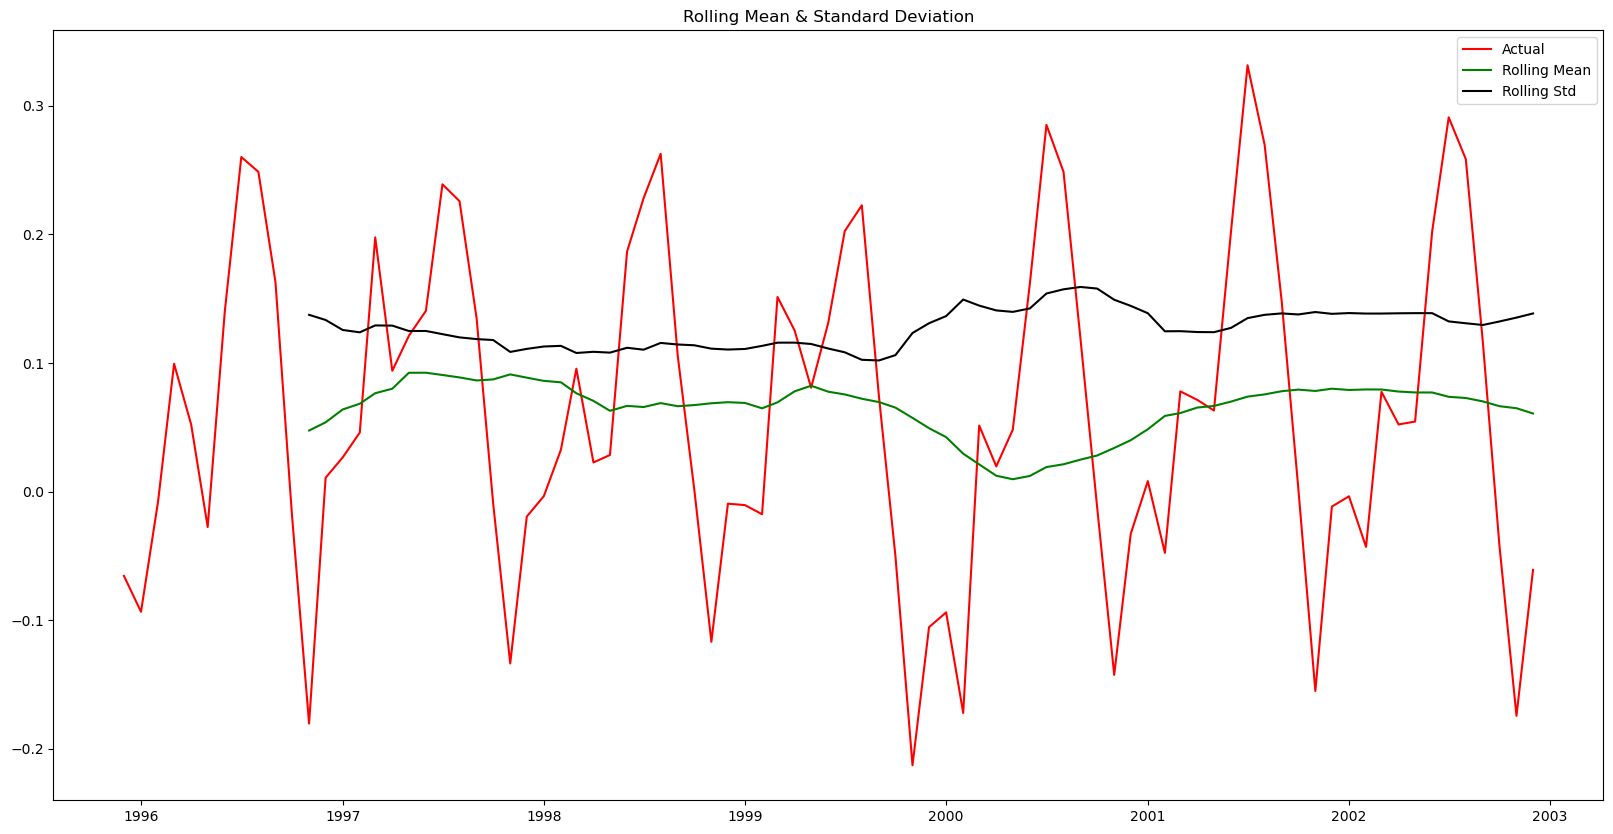

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [45]:
stationarity(data_log_diff)

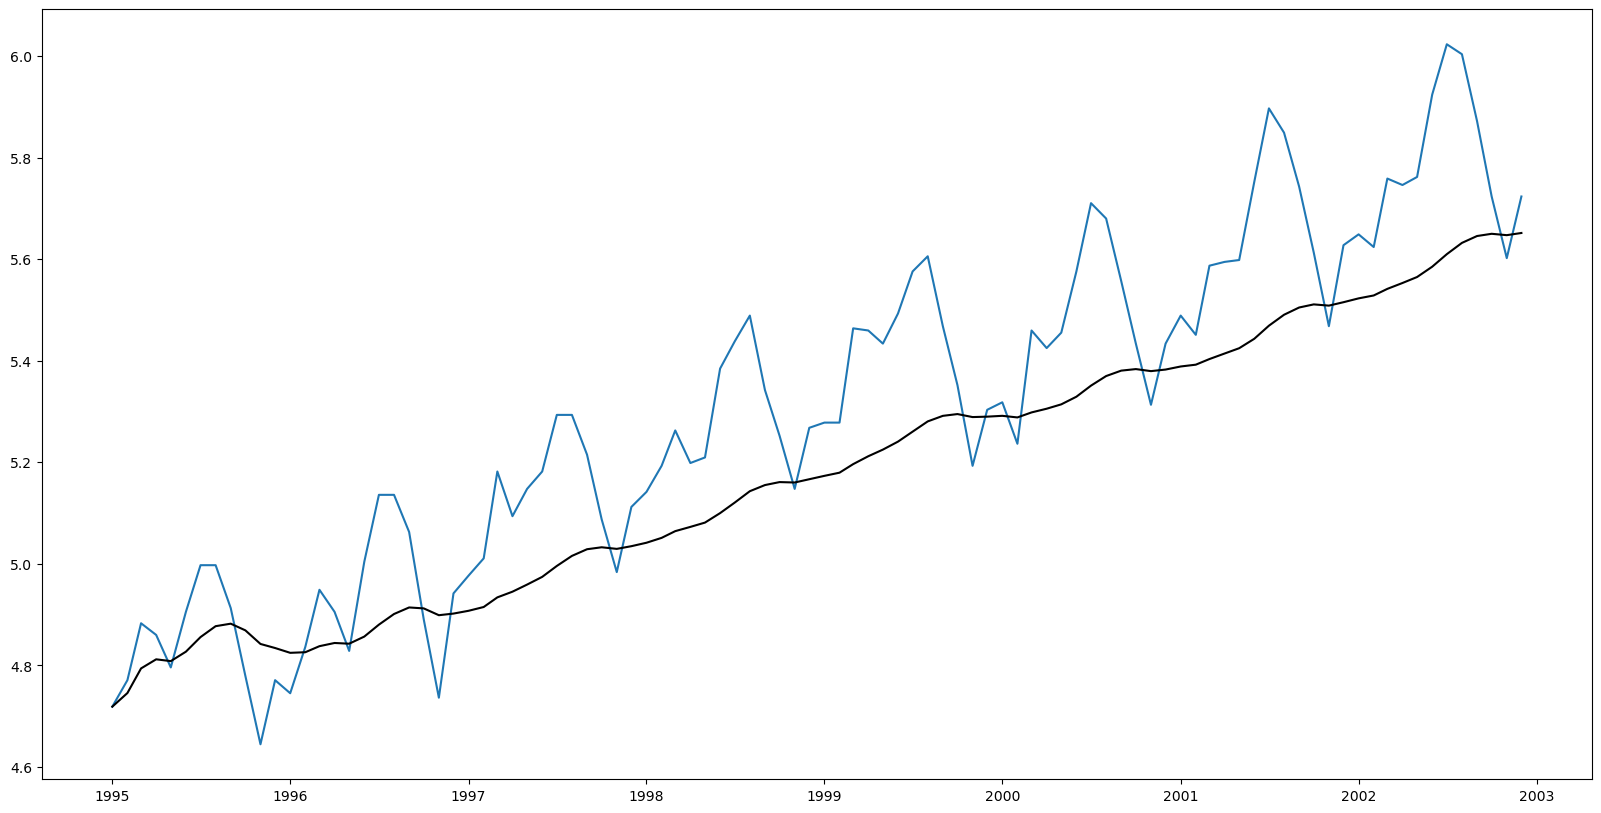

In [46]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

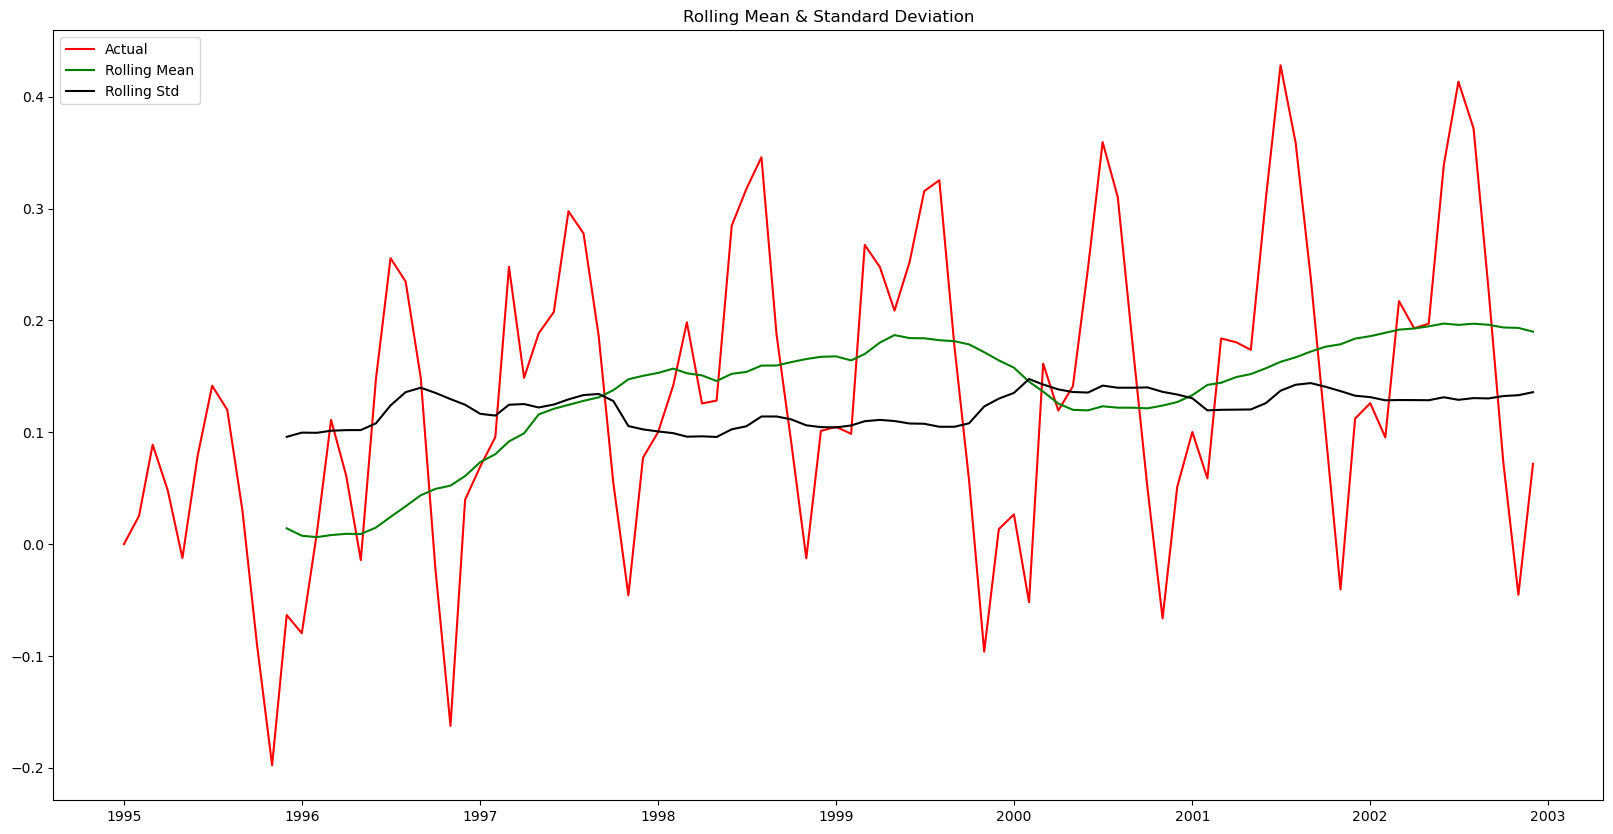

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [47]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

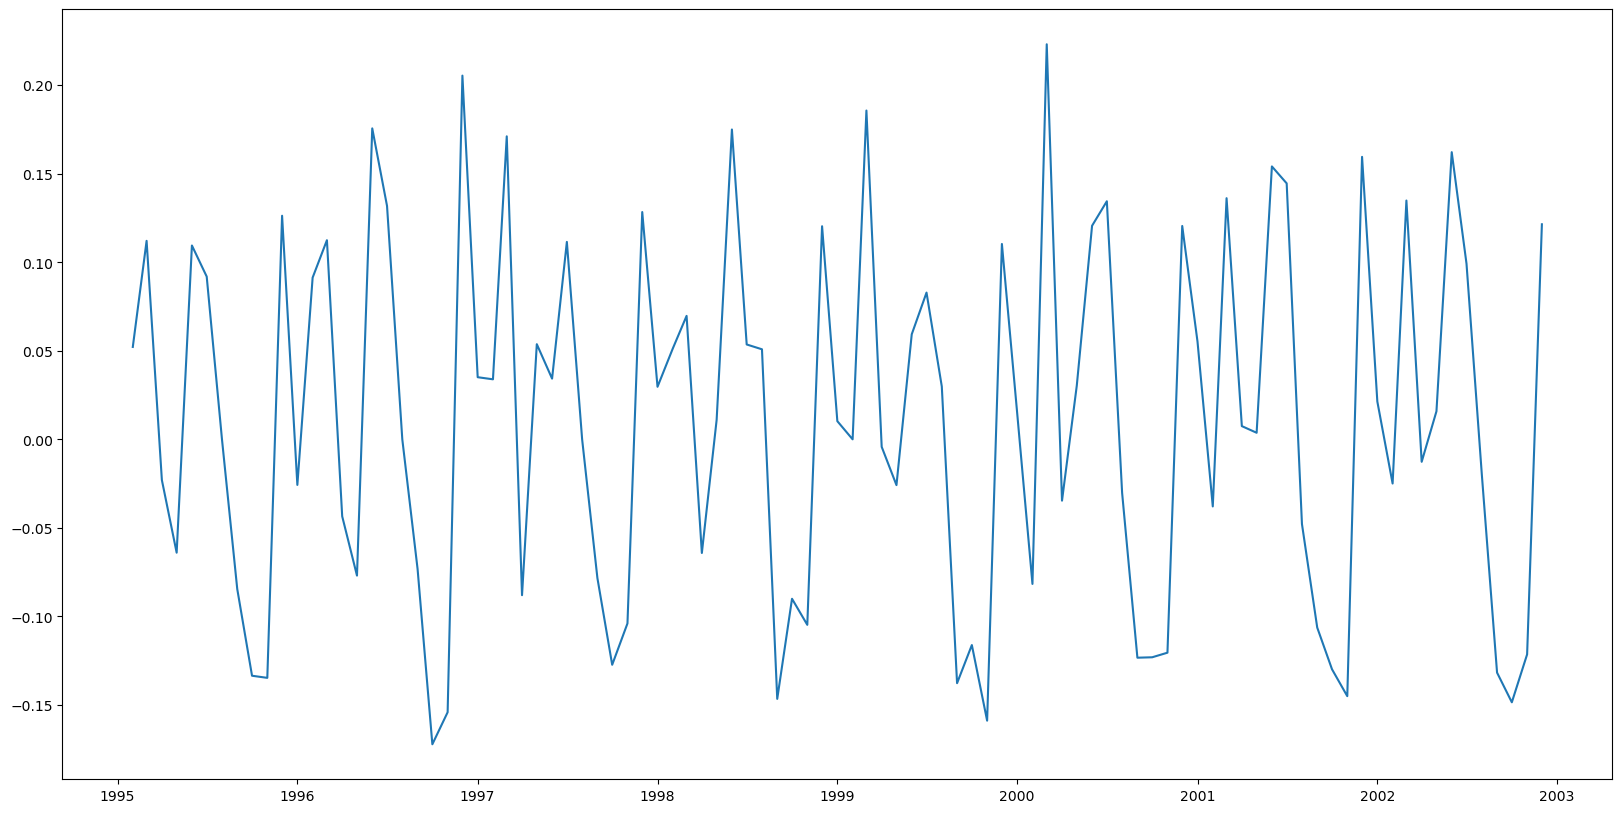

In [48]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

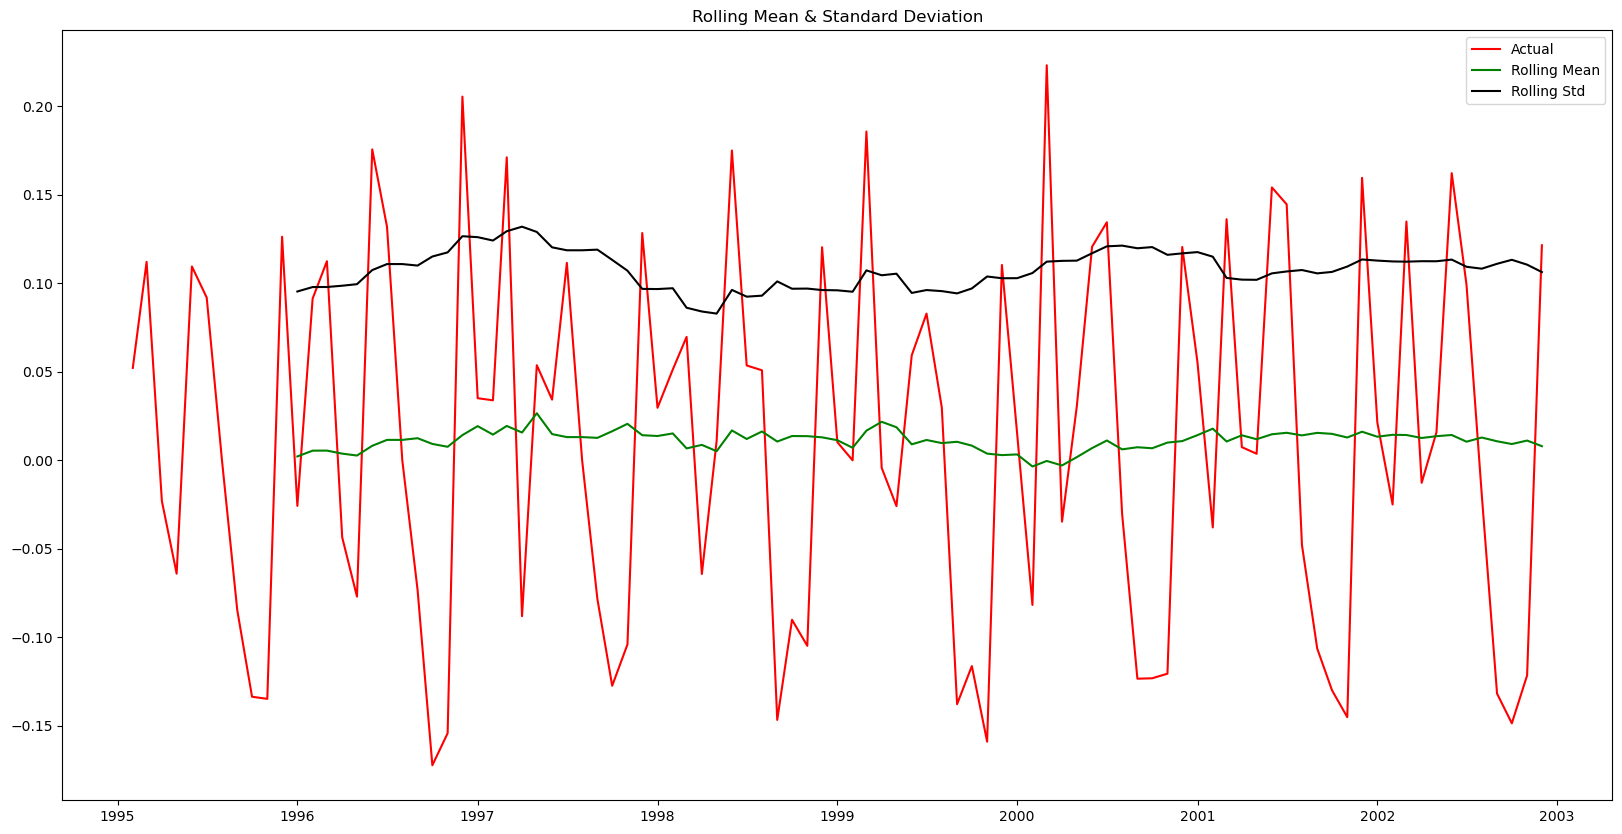

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [49]:
data_shift=data_shift.dropna()
stationarity(data_shift)

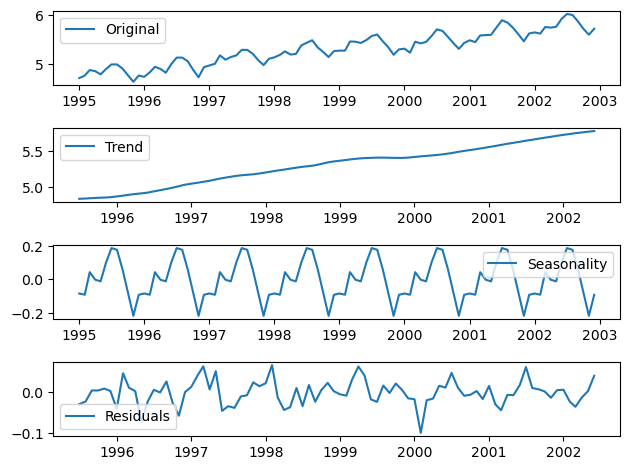

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Autocorrelation Function')

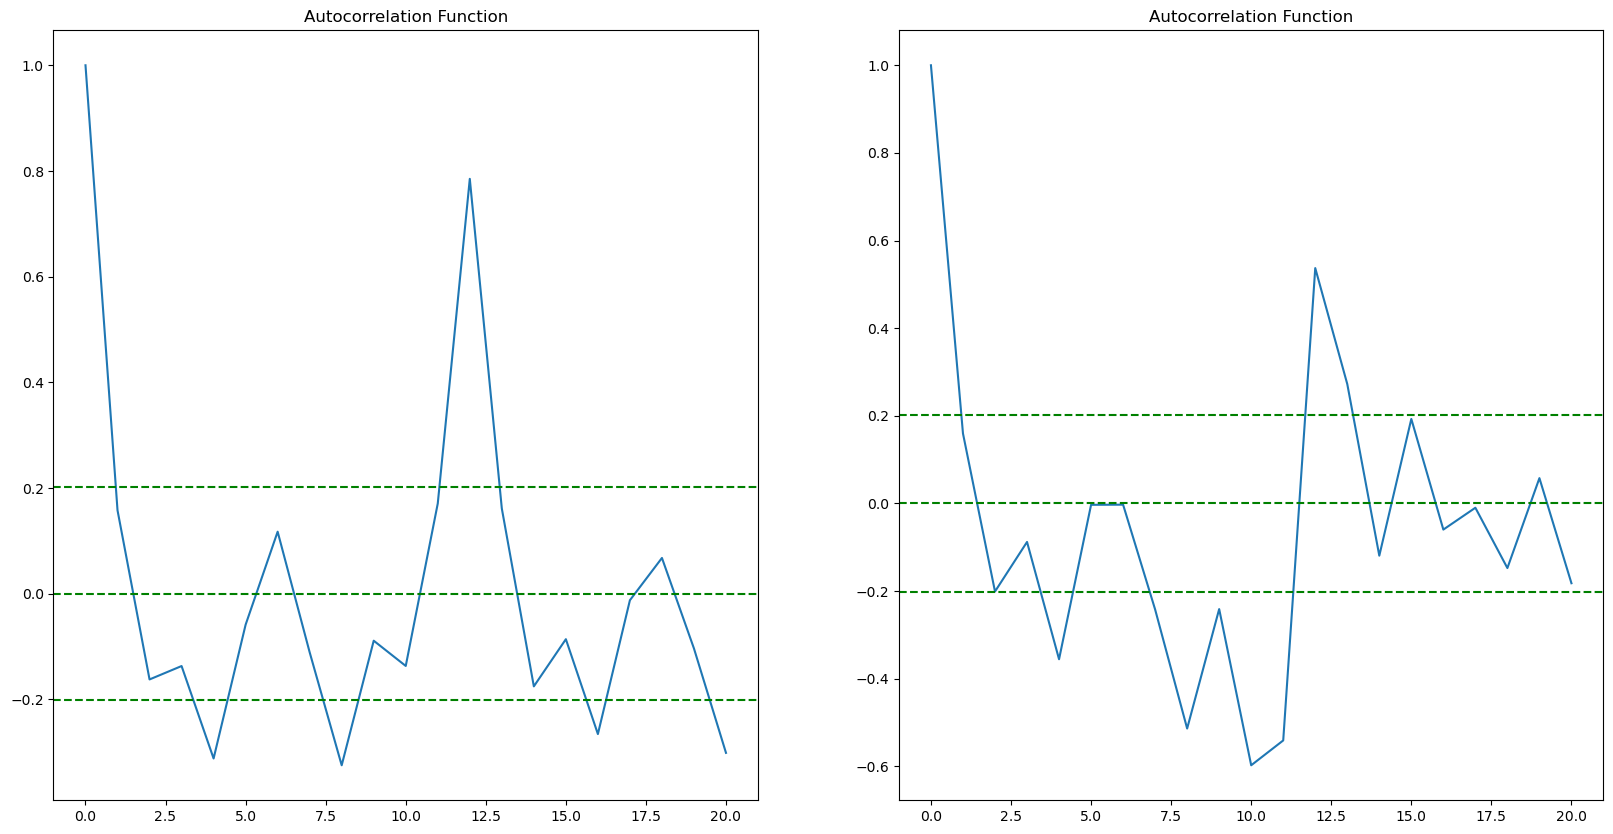

In [51]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

# ARIMA Model

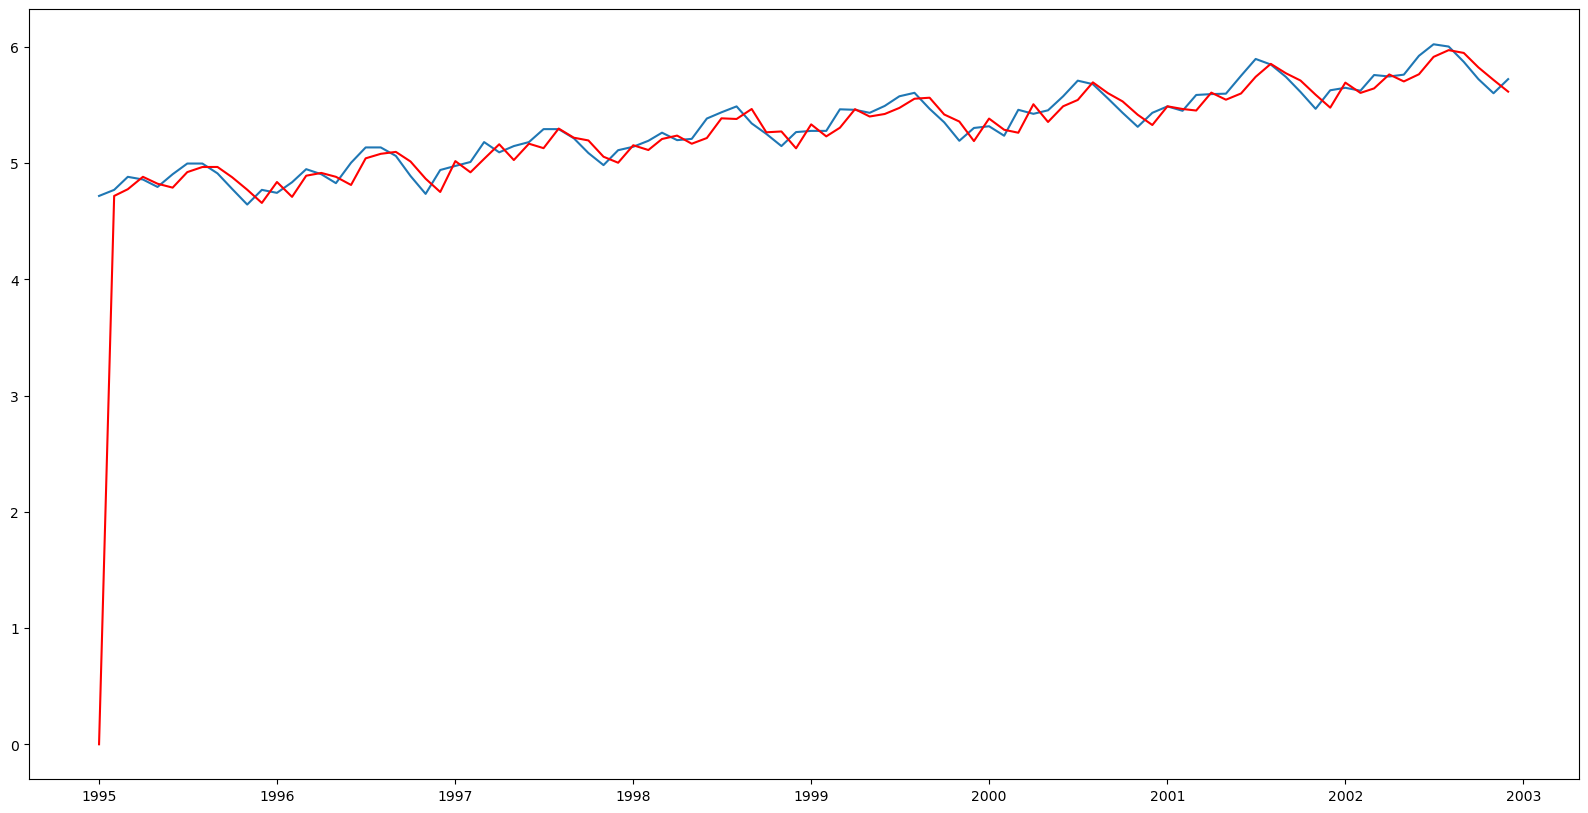

In [52]:
model = ARIMA(data_log, order=(2,1,2))
results = model.fit()

# Plotting the results
plt.figure(figsize=(20,10))
plt.plot(data_log)
plt.plot(results.fittedvalues, color='red')
plt.show()

In [53]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776290
1995-04-01    4.882906
1995-05-01    4.823609
dtype: float64


In [54]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494788
1995-04-01    14.377695
1995-05-01    19.201304
dtype: float64


In [55]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1995-01-01     4.718499
1995-02-01     9.489184
1995-03-01    14.377590
1995-04-01    19.237507
1995-05-01    23.997095
dtype: float64

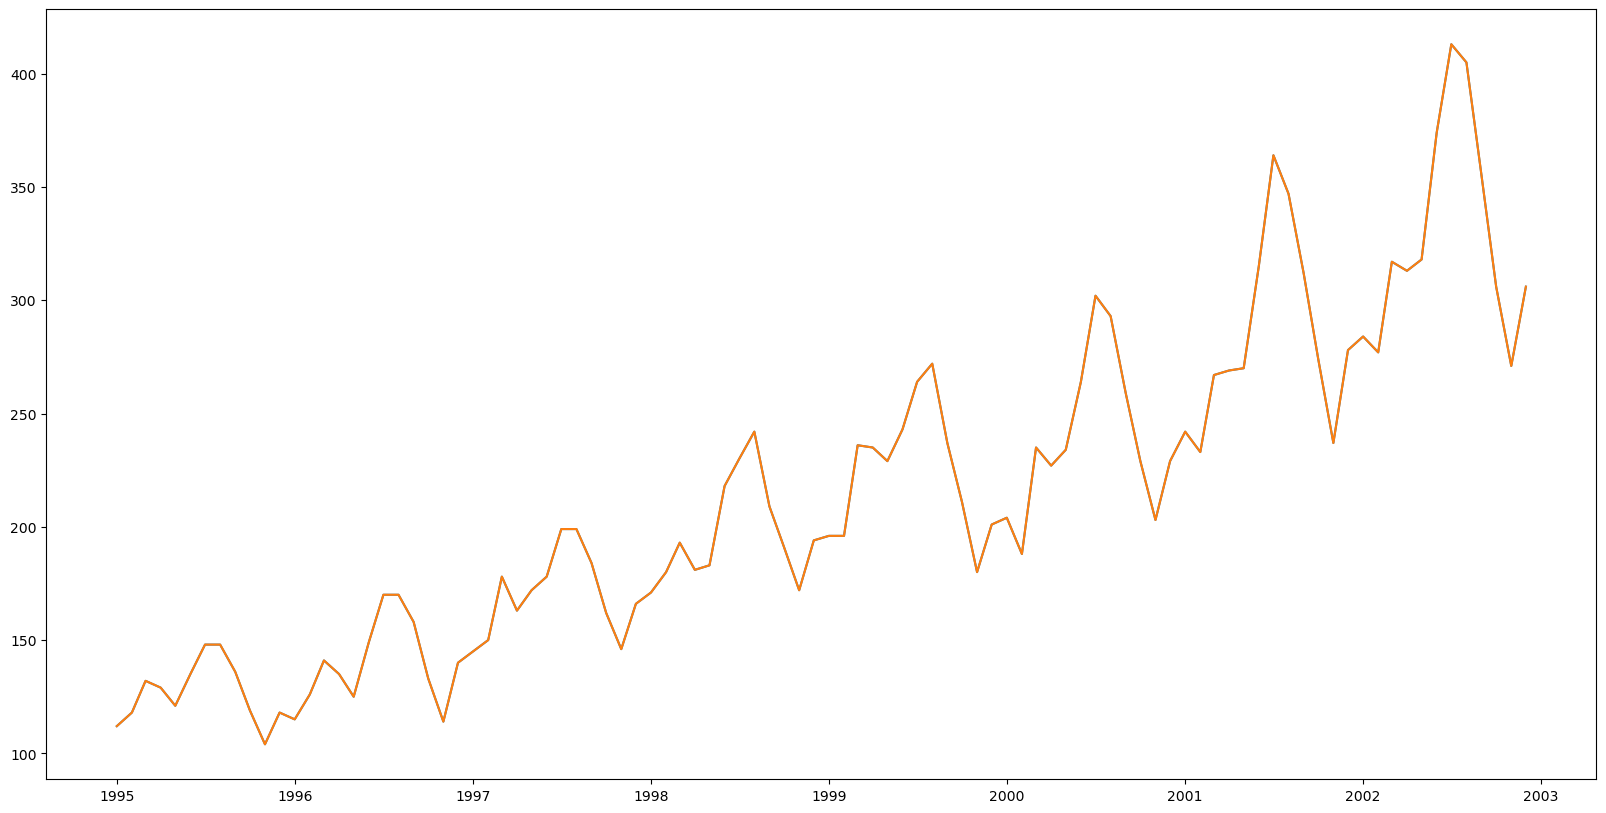

In [56]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [57]:
results.forecast(steps=120)

2003-01-01    5.785469
2003-02-01    5.763397
2003-03-01    5.768740
2003-04-01    5.766106
2003-05-01    5.766358
                ...   
2012-08-01    5.765635
2012-09-01    5.765635
2012-10-01    5.765635
2012-11-01    5.765635
2012-12-01    5.765635
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64